# Importing Packages

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 300)

import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

# Importing data

In [3]:
data = pd.read_csv('amazon_alexa.tsv', delimiter='\t')
data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1
3,5,31-Jul-18,Charcoal Fabric,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in between!!",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, checking time, looking up weather. There are many more task to learn. It was simple to set up.",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my entire home, TV, all my lights, my thermostat, my front door dead bolt, the cameras... and i love listening to npr. these things are well worth the value and they really shine once you stat adding smart devices and you can control your entire home l...",1
3148,5,30-Jul-18,White Dot,"Only complaint I have is that the sound quality isn't great. I mostly use it for commands though, and I have another dot hooked up to my stereo system to play music through. I have a couple friends that have a dot and don't mind the audio quality, but if you're bothered by that kind of thing I'd...",1


In [4]:
test = data.copy(deep=True)
test.loc[test['feedback'] == 1, 'feedback'] == 'Positive'
test.loc[test['feedback'] == 0, 'feedback'] == 'Negative'

46      False
111     False
141     False
162     False
176     False
        ...  
3047    False
3048    False
3067    False
3091    False
3096    False
Name: feedback, Length: 257, dtype: bool

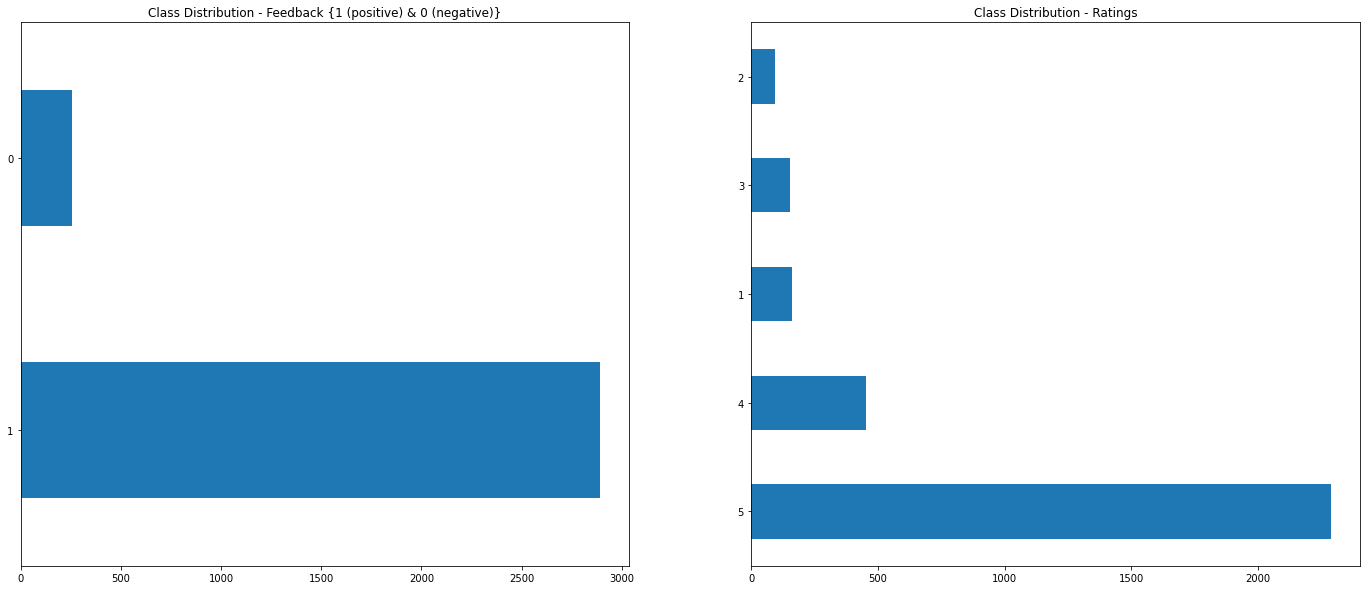

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(24, 10))

data.feedback.value_counts().plot.barh(ax=axs[0])
axs[0].set_title(("Class Distribution - Feedback {1 (positive) & 0 (negative)}"));

data.rating.value_counts().plot.barh(ax=axs[1])
axs[1].set_title("Class Distribution - Ratings");

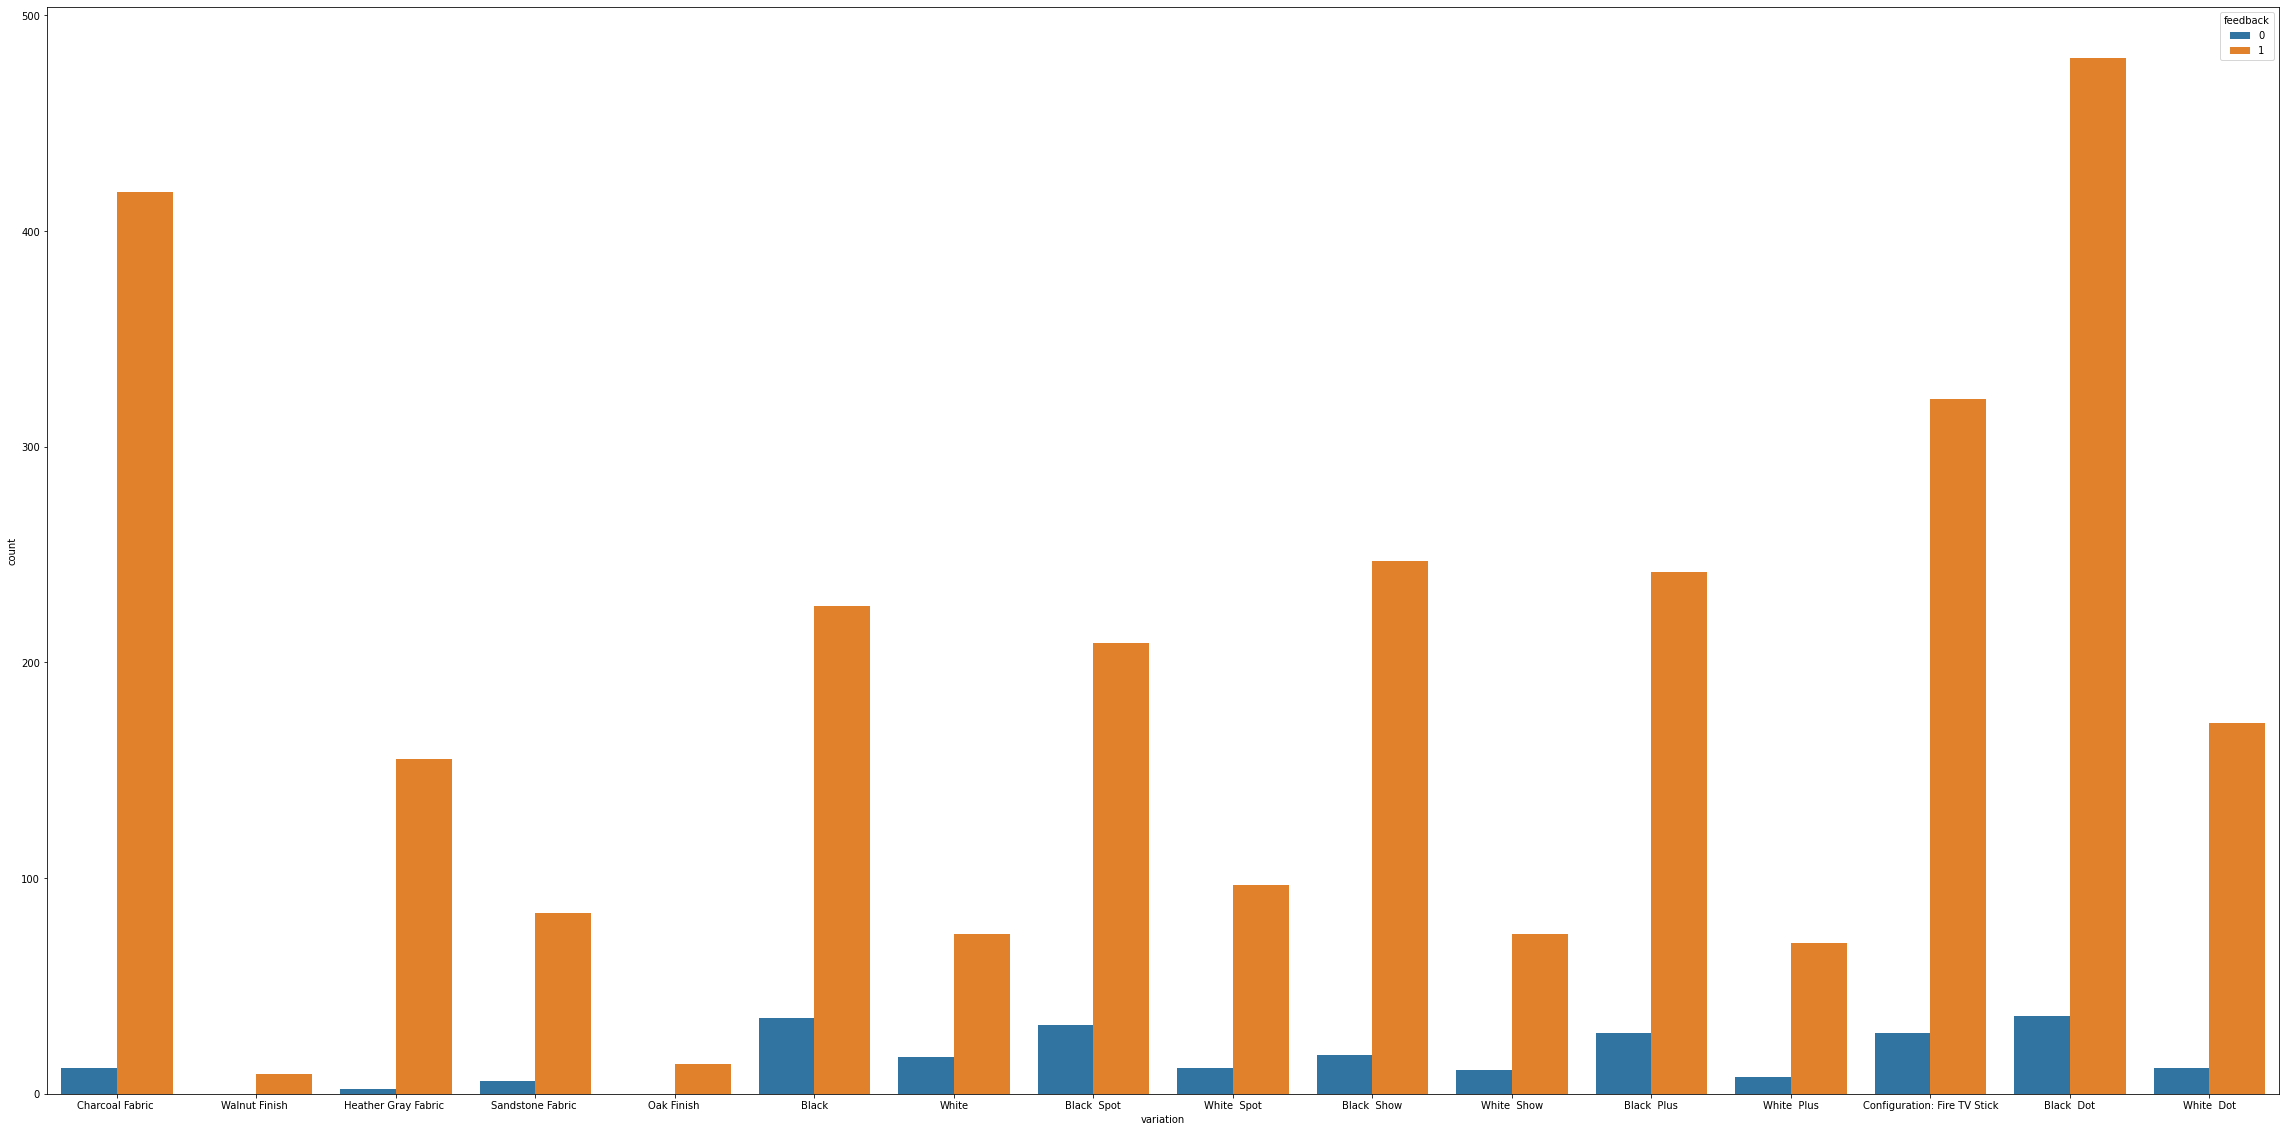

In [6]:
plt.figure(figsize=(40,20))
sns.countplot('variation', hue="feedback", data=data)

In [7]:
from wordcloud import WordCloud

def wc(data, bgcolor, title):
    plt.figure(figsize = (50,50))
    wc = WordCloud(background_color = bgcolor, max_words = 2000, random_state = 42, max_font_size = 50)
    wc.generate(''.join(data))
    plt.imshow(wc)
    plt.axis('off')

# Displaying first 5 rows of data

In [8]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1
3,5,31-Jul-18,Charcoal Fabric,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [9]:
comm = data
comm.shape

(3150, 5)

# Calculating Sentiment Polarity for each comment

In [10]:
polarity = []
subjectivity = []
for i in comm['verified_reviews'].values:
    try:
        analysis = TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)
    except:
        polarity.append(0)
        subjectivity.append(0)

# Adding the Sentiment polarity and Subjectivity to the data

In [11]:
comm['polarity'] = polarity
comm['subjectivity'] = subjectivity

# Displaying the reviews with newly added columns 

In [12]:
comm[comm.polarity<0].head(10)

,rating,date,variation,verified_reviews,feedback,polarity,subjectivity
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1,-0.100000,0.51250
14,5,30-Jul-18,Oak Finish,Just what I expected....,1,-0.100000,0.40000
29,5,30-Jul-18,Charcoal Fabric,Just like the other one,1,-0.125000,0.37500
109,4,30-Jul-18,Sandstone Fabric,The outlet does not work with it. Was disappointed in that.,1,-0.750000,0.75000
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,-0.100000,0.20000
145,3,30-Jul-18,Sandstone Fabric,it's annoying that everything they show Alexa as being able to do has to be downloaded. You spend so much time trying to figure out how to phrase it for the machine that you may as well just look it up yourself,1,-0.033333,0.57500
164,4,30-Jul-18,Charcoal Fabric,"It performs pretty much as expected, but I am very disappointed it will not provide me with the terminology I need to play various kinds of music without subscribing to the Amazon music service. I understand my music choices may be limited, but without knowing HOW TO ASK, I cannot access the mu...",1,-0.082738,0.63631
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,-0.650000,0.95000
262,5,29-Jul-18,Sandstone Fabric,Arrived as expected.,1,-0.100000,0.40000
299,2,29-Jul-18,Charcoal Fabric,Too difficult to set up. It keeps timing out before you can enter the password,0,-0.500000,1.00000


# Displaying highly positive reviews

In [13]:
comm[comm.polarity>0.75].head(10)

,rating,date,variation,verified_reviews,feedback,polarity,subjectivity
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0.875000,0.800
8,5,30-Jul-18,Heather Gray Fabric,looks great,1,0.800000,0.750
9,5,30-Jul-18,Heather Gray Fabric,"Love it! I’ve listened to songs I haven’t heard since childhood! I get the news, weather, information! It’s great!",1,0.988281,0.675
27,5,30-Jul-18,Charcoal Fabric,Sounds great!! Love them!,1,0.812500,0.675
34,5,30-Jul-18,Charcoal Fabric,This device is awesome!,1,1.000000,1.000
44,5,30-Jul-18,Sandstone Fabric,Great,1,0.800000,0.750
71,5,30-Jul-18,Charcoal Fabric,Works and sounds great.,1,0.800000,0.750
75,5,30-Jul-18,Charcoal Fabric,It’s awesome,1,1.000000,1.000
77,5,30-Jul-18,Heather Gray Fabric,The speaker has excellent sound and works perfectly!,1,0.800000,0.800
82,5,30-Jul-18,Charcoal Fabric,Great technology!! Can't believe the speaker volume and quality is so wonderful. Wish I had bought another one!,1,1.000000,0.875


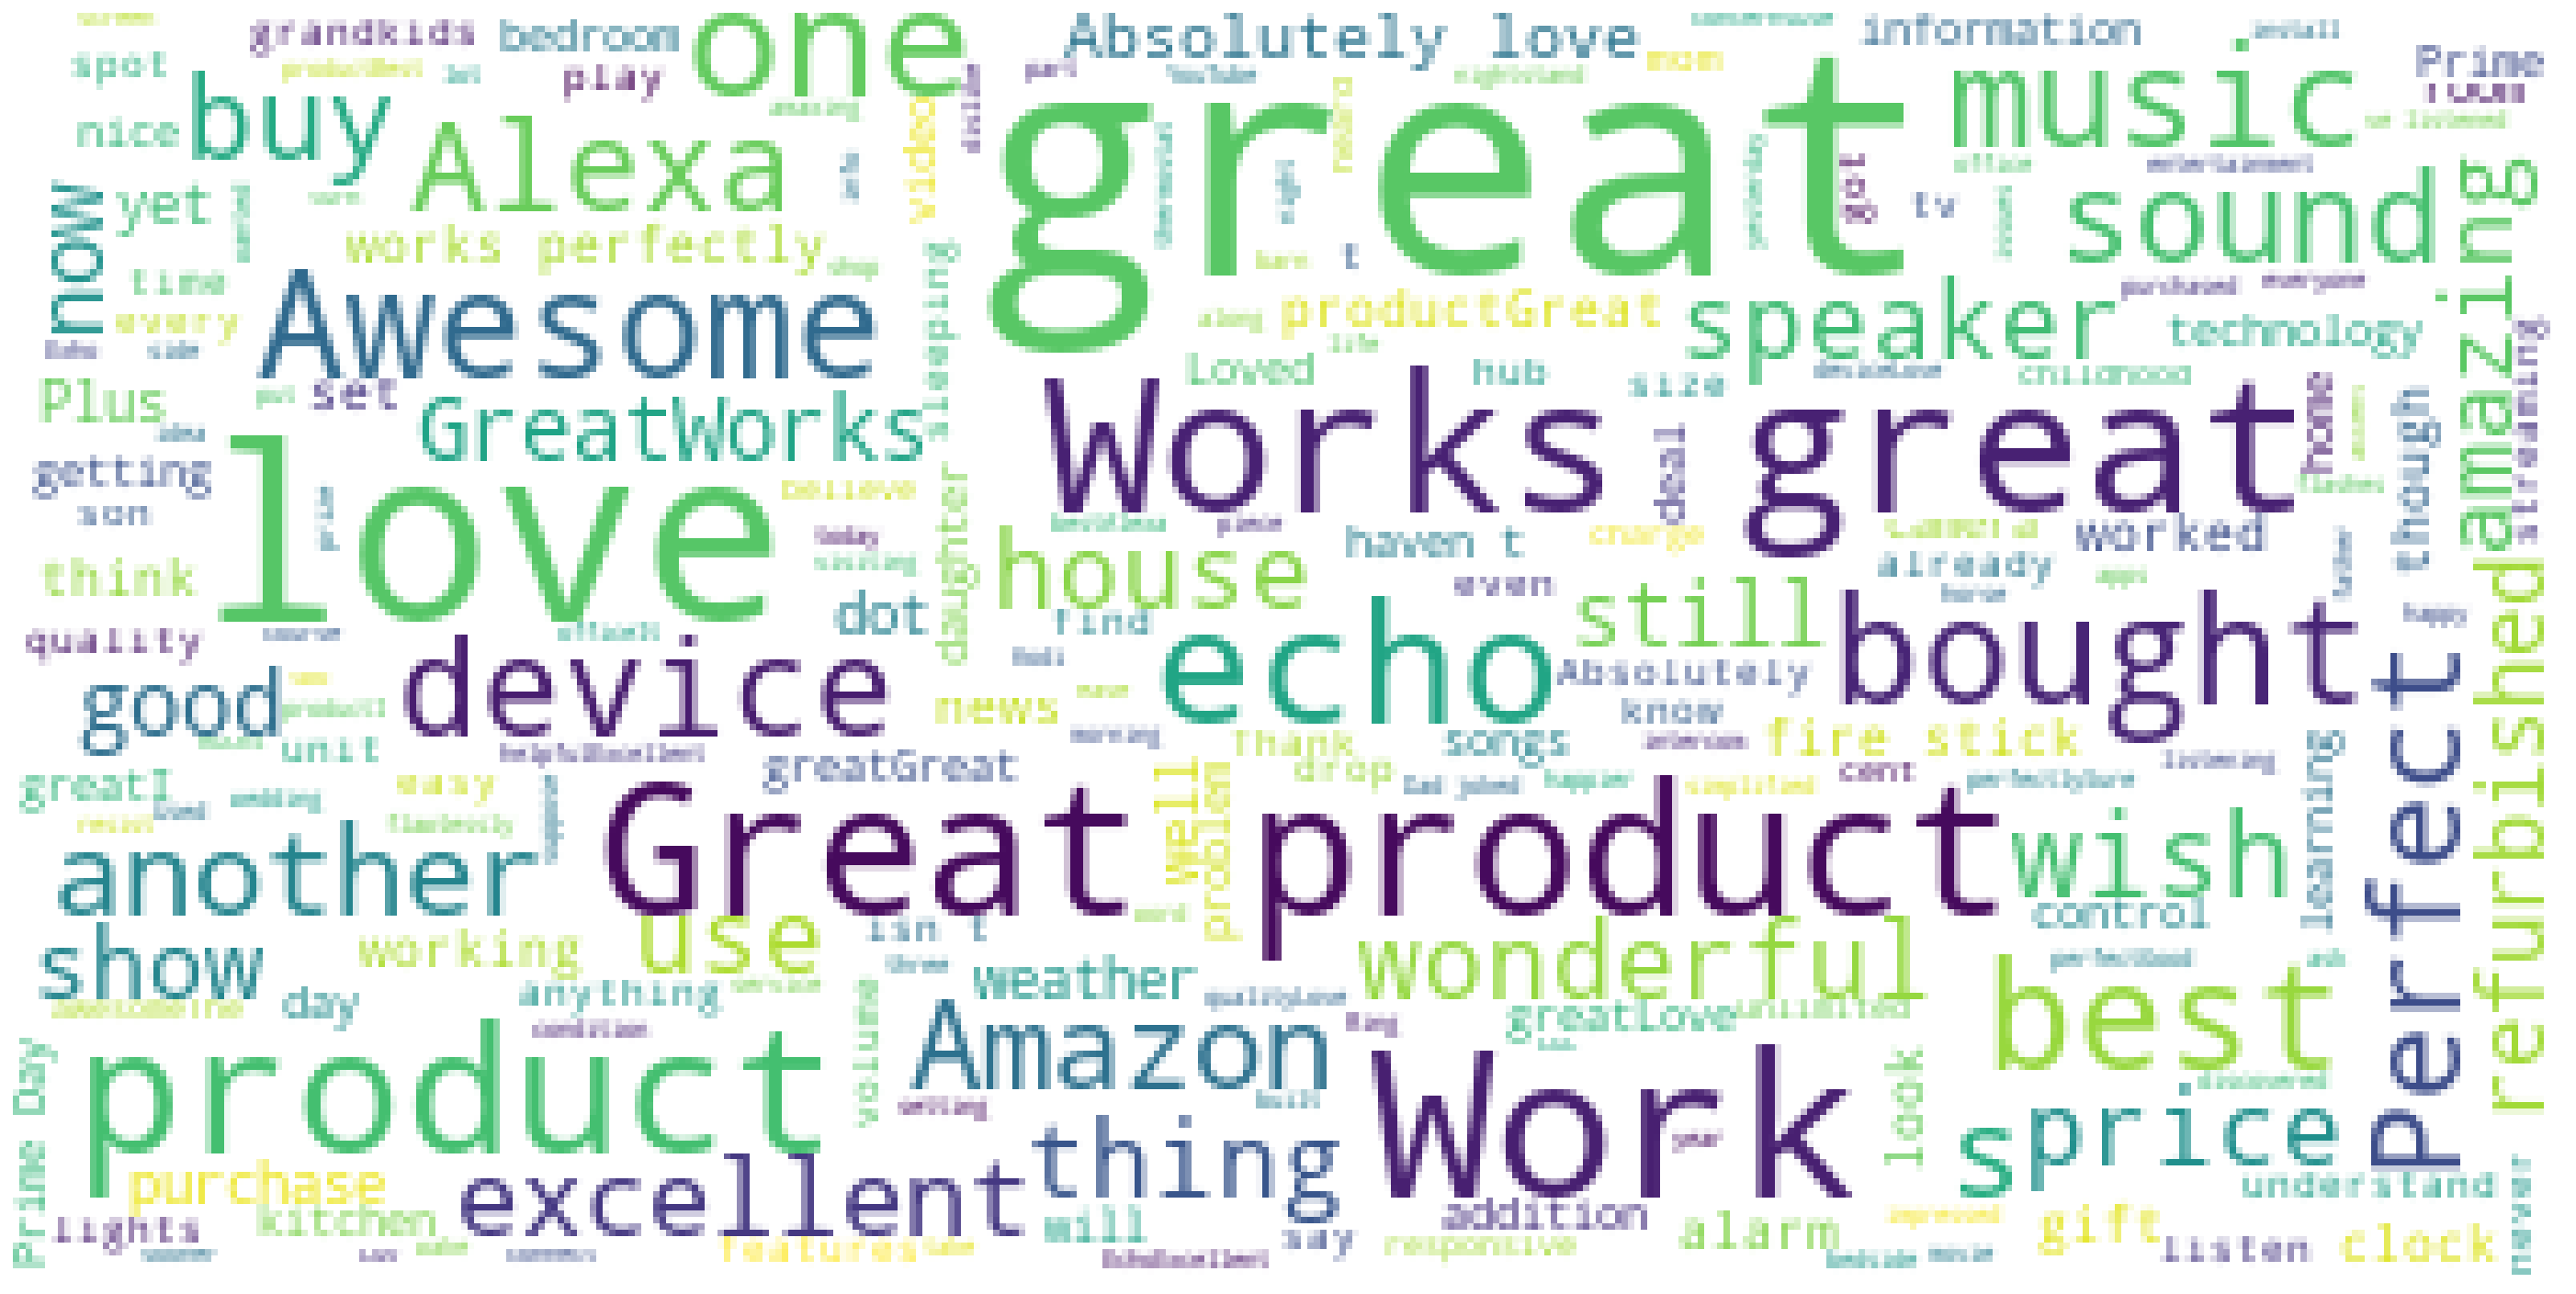

In [14]:
wc(comm['verified_reviews'][comm.polarity>0.75],'white','Common Words')

# Displaying higly negative reviews

In [15]:
comm[comm.polarity<0.25].head(10)

,rating,date,variation,verified_reviews,feedback,polarity,subjectivity
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1,-0.100000,0.512500
4,5,31-Jul-18,Charcoal Fabric,Music,1,0.000000,0.000000
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use. It IS a great alarm. If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to he...",1,0.216667,0.458333
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'm working on getting one in every room of my house. I really like what features they offer specifily playing music on all Echos and controlling the lights throughout my house.,1,0.200000,0.200000
10,5,30-Jul-18,Charcoal Fabric,"I sent it to my 85 year old Dad, and he talks to it constantly.",1,0.050000,0.266667
12,5,30-Jul-18,Oak Finish,"I purchased this for my mother who is having knee problems now, to give her something to do while trying to over come not getting around so fast like she did.She enjoys all the little and big things it can do...Alexa play this song, What time is it and where, and how to cook this and that!",1,0.004167,0.400000
14,5,30-Jul-18,Oak Finish,Just what I expected....,1,-0.100000,0.400000
17,5,30-Jul-18,Heather Gray Fabric,We have only been using Alexa for a couple of days and are having a lot of fun with our new toy. It like having a new household member! We are trying to learn all the different featues and benefits that come with it.,1,0.121364,0.541818
18,5,30-Jul-18,Charcoal Fabric,We love the size of the 2nd generation echo. Still needs a little improvement on sound,1,0.178125,0.375000
19,4,30-Jul-18,Sandstone Fabric,"I liked the original Echo. This is the same but shorter and with greater fabric/color choices. I miss the volume ring on top, now it's just the plus/minus buttons. Not a big deal but the ring w as comforting. :) Other than that, well I do like the use of a standard USB charger /port instead of t...",1,0.157222,0.422778


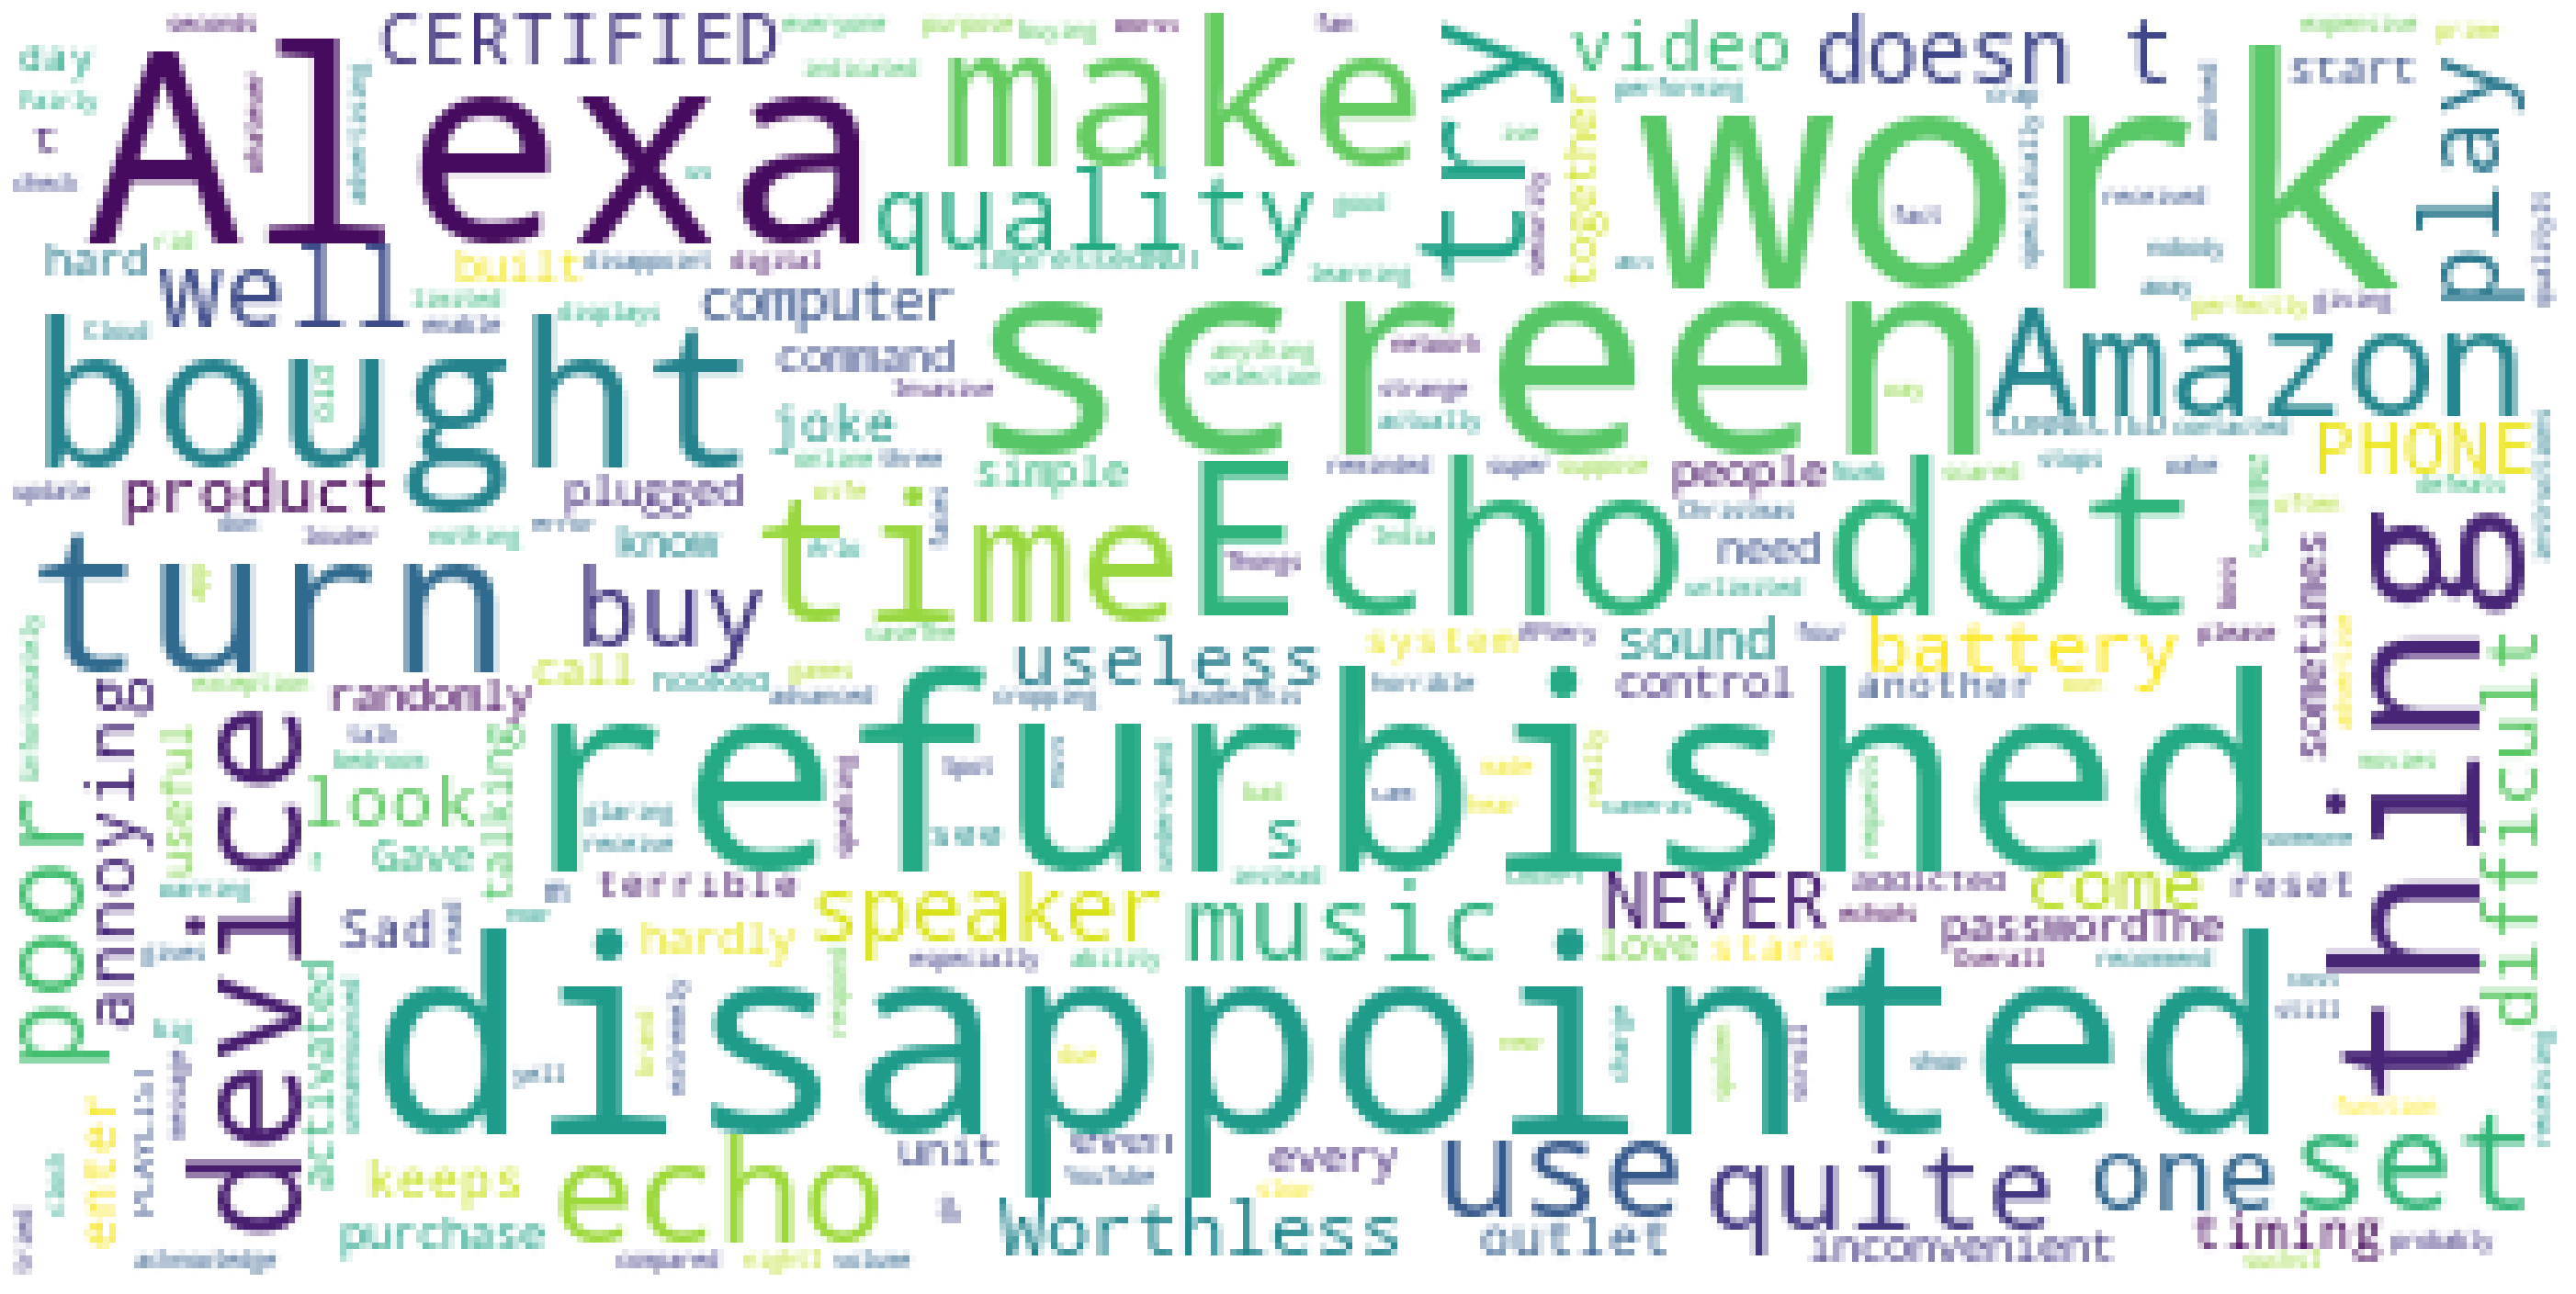

In [16]:
wc(comm['verified_reviews'][comm.polarity<-0.25],'white','Common Words')

# Distribution of positive comments

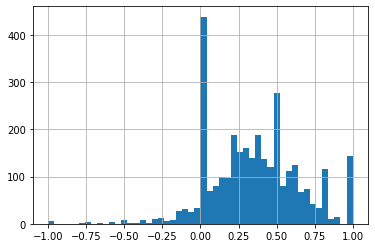

In [17]:
comm.polarity.hist(bins=50)

# Classifying and Analyzing the bad reviews through out the dataset

In [18]:
negative_data = comm[comm.polarity<-0]
negative_data.shape

(189, 7)

In [19]:
negative_data["index"] = range(0,189)
negative_data = negative_data.set_index("index")
negative_data.head()

,rating,date,variation,verified_reviews,feedback,polarity,subjectivity
index,,,,,,,
0,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1,-0.100,0.5125
1,5,30-Jul-18,Oak Finish,Just what I expected....,1,-0.100,0.4000
2,5,30-Jul-18,Charcoal Fabric,Just like the other one,1,-0.125,0.3750
3,4,30-Jul-18,Sandstone Fabric,The outlet does not work with it. Was disappointed in that.,1,-0.750,0.7500
4,1,30-Jul-18,Charcoal Fabric,Not much features.,0,-0.100,0.2000


In [20]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

In [21]:
STOPWORDS = set(stopwords.words('english'))
corpus = []
for i in range(0,189):
    review = re.sub('[^a-zA-Z]', ' ', negative_data['verified_reviews'][i])
    review = review.lower()
    review = review.split()
    stemmer = PorterStemmer()
    review = [stemmer.stem(token) for token in review if not token in STOPWORDS]
    review = ' '.join(review)
    corpus.append(review)
corpus

['sometim play game answer question correctli alexa say got wrong answer like abl turn light away home',
 'expect',
 'like one',
 'outlet work disappoint',
 'much featur',
 'annoy everyth show alexa abl download spend much time tri figur phrase machin may well look',
 'perform pretti much expect disappoint provid terminolog need play variou kind music without subscrib amazon music servic understand music choic may limit without know ask cannot access music provid free along echo purchas chart show languag need use',
 'sad joke worthless',
 'arriv expect',
 'difficult set keep time enter password',
 'realli use speaker stream music month kinda useless',
 'echo come built batteri plug time use make quit inconveni',
 'alexa hardli came',
 'loud',
 'thing bare work select rd parti app stuff think could box send mine back asap wast money',
 'weird paus speech pattern present echo devic',
 'poor qualiti gave away',
 'initi echo dot work well time dot stop respond alexa unless within one foot

In [22]:
words = []
for i in range(0, len(corpus)):
    words = words + (re.findall(r'\w+', corpus[i]))
from collections import Counter
words_counts = Counter(words)
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse = True)
most_common_words

[('echo', 72),
 ('work', 56),
 ('devic', 51),
 ('alexa', 47),
 ('use', 46),
 ('dot', 45),
 ('like', 38),
 ('amazon', 38),
 ('one', 36),
 ('music', 36),
 ('time', 33),
 ('play', 32),
 ('tri', 31),
 ('disappoint', 27),
 ('screen', 27),
 ('set', 26),
 ('thing', 25),
 ('get', 24),
 ('sound', 23),
 ('product', 23),
 ('need', 22),
 ('turn', 21),
 ('ask', 20),
 ('would', 20),
 ('connect', 20),
 ('clock', 19),
 ('refurbish', 18),
 ('want', 18),
 ('also', 18),
 ('expect', 17),
 ('show', 17),
 ('well', 17),
 ('speaker', 17),
 ('alarm', 17),
 ('bought', 16),
 ('app', 15),
 ('buy', 15),
 ('issu', 14),
 ('light', 13),
 ('home', 13),
 ('know', 13),
 ('qualiti', 13),
 ('two', 13),
 ('never', 13),
 ('day', 13),
 ('even', 13),
 ('understand', 12),
 ('could', 12),
 ('back', 12),
 ('prime', 12),
 ('phone', 12),
 ('got', 11),
 ('much', 11),
 ('without', 11),
 ('purchas', 11),
 ('make', 11),
 ('problem', 11),
 ('unit', 11),
 ('small', 11),
 ('seem', 11),
 ('answer', 10),
 ('say', 10),
 ('realli', 10),
 ('m

In [23]:
most_common_wordList = []
most_common_countList = []
for x, y in most_common_words:
    most_common_wordList.append(x)
    most_common_countList.append(y)

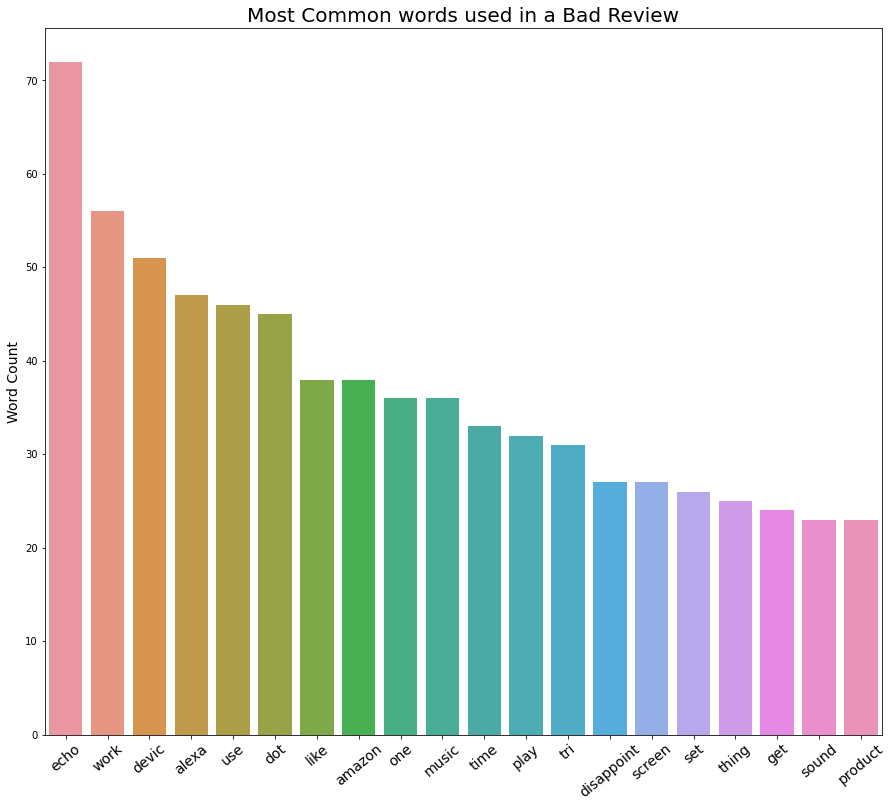

In [24]:
import seaborn as sns
plt.figure(figsize=(15,13))
plot = sns.barplot(np.arange(20), most_common_countList[0:20])
plt.ylabel('Word Count', fontsize=14)
plt.xticks(np.arange(20), most_common_wordList[0:20], fontsize=14, rotation=40)
plt.title('Most Common words used in a Bad Review', fontsize=20)
plt.show()

# Converting the polarity values from continuous to categorical 

In [25]:
comm['polarity'][comm.polarity==0] = 0
comm['polarity'][comm.polarity>0] = 1
comm['polarity'][comm.polarity<0] = -1

# Calculating the count of Positive,Neutral and Negative reviews 

 1.0    2565
 0.0     396
-1.0     189
Name: polarity, dtype: int64

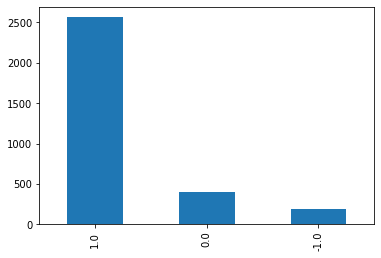

In [26]:
comm.polarity.value_counts().plot.bar()
comm.polarity.value_counts()

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
Vectorize = TfidfVectorizer(analyzer='word', stop_words='english', ngram_range=(1,2), min_df = 2)
X = Vectorize.fit_transform(corpus).toarray()
Y = negative_data['feedback']

### Let us fit some models and check

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score,roc_curve,auc

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42)

# Random Forest Classifier

In [30]:
model1 = RandomForestClassifier(n_estimators=200, max_features="auto")
model1.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [31]:
y_pred1 = model1.predict(x_test)
accuracy1 = accuracy_score(y_test,y_pred1)
print("Accuracy for RandomForest:\t"+str(accuracy1))
print("Precision for RandomForest:\t"+str(precision_score(y_test,y_pred1)))
print("Recall for RandomForest:\t"+str(recall_score(y_test,y_pred1)))

Accuracy for RandomForest:	0.6875
Precision for RandomForest:	0.6388888888888888
Recall for RandomForest:	0.92


# Gradient Boosting Classifier

In [32]:
model2 = GradientBoostingClassifier(learning_rate=1.5, verbose=1, max_features='auto')
model2.fit(x_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.0757            0.39s
         2           0.8760            0.34s
         3           0.6978            0.36s
         4           0.5727            0.34s
         5           0.4671            0.30s
         6           0.3814            0.31s
         7           0.2879            0.32s
         8           0.1849            0.30s
         9           0.0533            0.29s
        10           0.0419            0.29s
        20           0.0052            0.26s
        30           0.0013            0.23s
        40           0.0004            0.19s
        50           0.0001            0.16s
        60           0.0001            0.12s
        70           0.0000            0.10s
        80           0.0000            0.06s
        90           0.0000            0.03s
       100           0.0000            0.00s


GradientBoostingClassifier(learning_rate=1.5, max_features='auto', verbose=1)

In [33]:
y_pred2 = model2.predict(x_test)
accuracy2 = accuracy_score(y_test,y_pred2)
print("Accuracy for GradientBoosting:\t"+str(accuracy2))
print("Precision for GradientBoosting:\t"+str(precision_score(y_test,y_pred2)))
print("Recall for GradientBoosting:\t"+str(recall_score(y_test,y_pred2)))

Accuracy for GradientBoosting:	0.7291666666666666
Precision for GradientBoosting:	0.6764705882352942
Recall for GradientBoosting:	0.92


From the above two models, we can see that GradientBoost classifies the data better than Randon forest Classifier